# Step 0: Import Libraries


In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Step 1: Import Data

In [2]:
df = pd.read_csv('stock_price.csv')

In [3]:
df.head(3)

,Interest Rates,Employment,S&P 500 Price
0,1.943859,55.413571,2206.680582
1,2.258229,59.546305,2486.474488
2,2.215863,57.414687,2405.868337


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Interest Rates  1000 non-null   float64
 1   Employment      1000 non-null   float64
 2   S&P 500 Price   1000 non-null   float64
dtypes: float64(3)
memory usage: 23.6 KB


# Step 2: Visualize Data

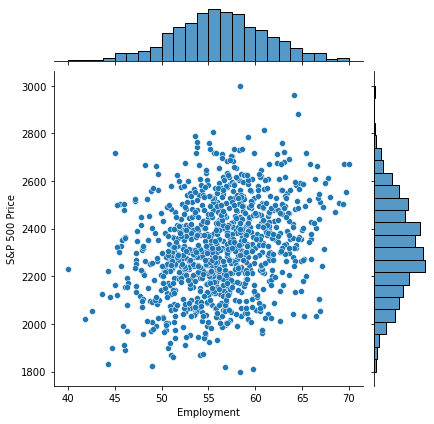

In [5]:
sns.jointplot( x = 'Employment', y = 'S&P 500 Price', data = df)

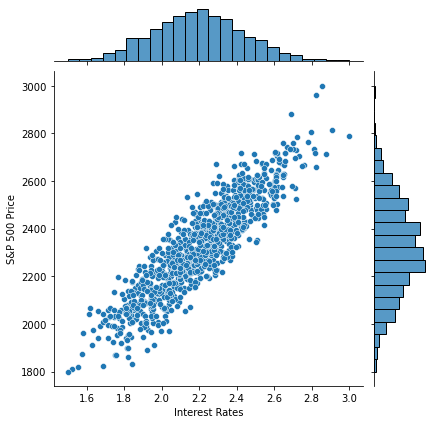

In [6]:
sns.jointplot( x = 'Interest Rates', y = 'S&P 500 Price', data = df)

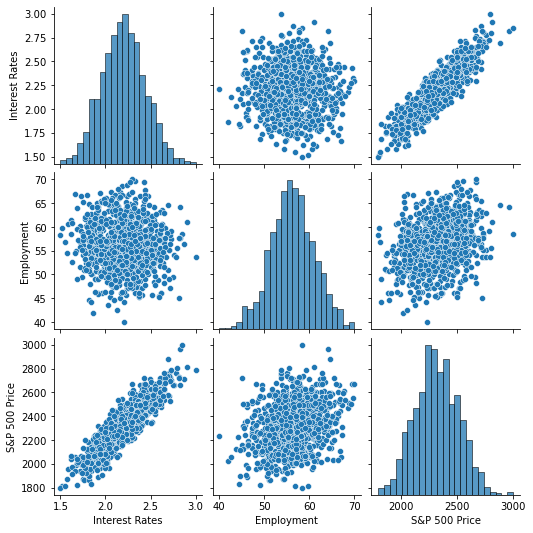

In [7]:
sns.pairplot(df)

# Step 3: Create Training and Testing Sets

In [8]:
y = df ['S&P 500 Price']

In [9]:
X = df[['Interest Rates', 'Employment']]

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Step 4: Train Model

In [11]:
regressor = LinearRegression(fit_intercept = True)
regressor.fit(X_train, y_train)
print('Linear Model Coefficients (m)', regressor.coef_)
print('Linear Model Coefficients (b)', regressor.intercept_)

Linear Model Coefficients (m) [726.58782374  12.39995562]
Linear Model Coefficients (b) 26.721385405096044


# Step 5: Evaluate Model

In [12]:
y_predict = regressor.predict(X_test)

Text(0.5, 1.0, 'Predictions vs Ground Truth')

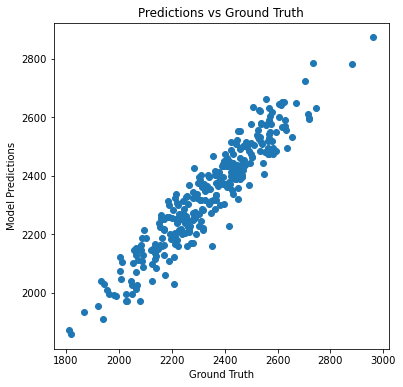

In [13]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_predict)
plt.ylabel('Model Predictions')
plt.xlabel('Ground Truth')
plt.title('Predictions vs Ground Truth')

In [14]:
X_test.shape

(300, 2)

In [15]:
#number of samples
n = X_test.shape[0]
#number of predictors
k = X_test.shape[1]

In [16]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)) , '.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2) * (n-1)/(n-k-1)
MAPE = np.mean( np.abs( (y_test-y_predict) / y_test  )  )*100

In [17]:
print('RMSE = ', RMSE, '\nMSE =', MSE , '\nMAE =', MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2, '\nMAPE =', MAPE)

RMSE =  63.54 
MSE = 4037.317672818159 
MAE = 52.09974808996405 
R2 = 0.89003456905339 
Adjusted R2 = 0.8892940611008875 
MAPE = 2.241228465749491


# Step 6: Visualize Results

In [18]:
from mpl_toolkits.mplot3d import Axes3D

In [19]:
x_surf, y_surf = np.meshgrid(np.linspace(df['Interest Rates'].min(),df['Interest Rates'].max(), 100),\
                             np.linspace(df['Employment'].min(),df['Employment'].max() , 100))

In [20]:
x_surf.shape

(100, 100)

In [21]:
onlyX = pd.DataFrame( {'Interest Rates': x_surf.ravel(), 'Employment':y_surf.ravel()    } ) 

In [22]:
onlyX.shape

(10000, 2)

In [23]:
fittedY = regressor.predict(onlyX)

In [24]:
fittedY.shape

(10000,)

In [25]:
fittedY = fittedY.reshape(x_surf.shape)

In [26]:
fittedY.shape

(100, 100)

Text(0.5, 0, 'Stock index price')

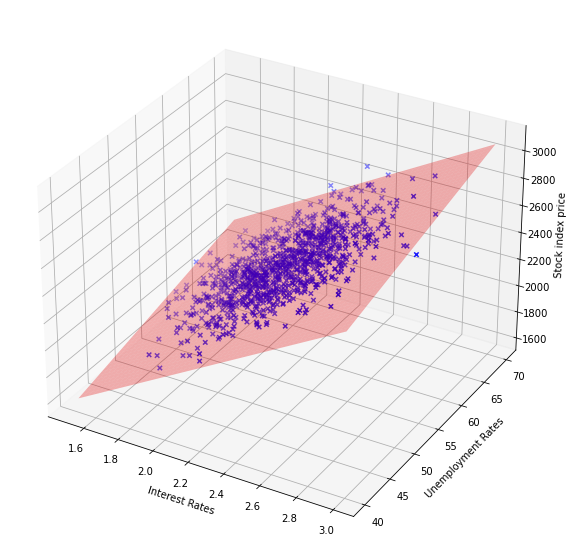

In [27]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')
ax.scatter( df['Interest Rates'], df['Employment'] , df['S&P 500 Price'] , c = 'b', marker ='x'  )
ax.plot_surface(x_surf, y_surf, fittedY, color = 'r', alpha = 0.3)
ax.set_xlabel('Interest Rates')
ax.set_ylabel('Unemployment Rates')
ax.set_zlabel('Stock index price')

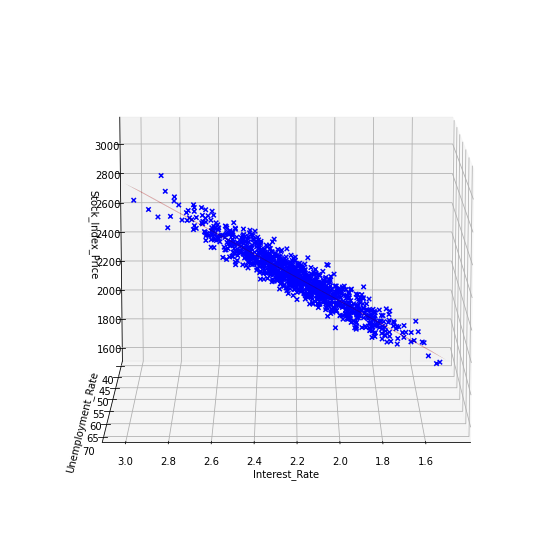

In [28]:
#Tilt to see linear correlation with interest rate
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Interest Rates'],df['Employment'],df['S&P 500 Price'],c='b', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='r', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(11, 90)
plt.show()

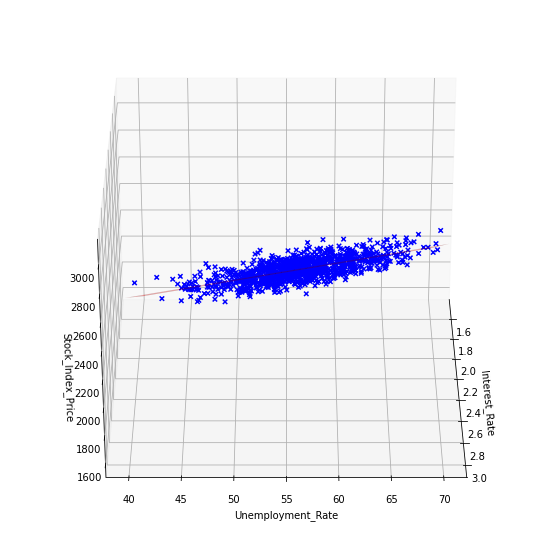

In [29]:
#Tilt to see linear correlation with unemployment rate
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df['Interest Rates'],df['Employment'],df['S&P 500 Price'],c='b', marker='x', alpha=1)
ax.plot_surface(x_surf, y_surf, fittedY, color='r', alpha=0.3)
ax.set_xlabel('Interest_Rate')
ax.set_ylabel('Unemployment_Rate')
ax.set_zlabel('Stock_Index_Price')
ax.view_init(29, 0)
plt.show()

In [30]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns = ['Coefficient'])
coeff_df

,Coefficient
Interest Rates,726.587824
Employment,12.399956
